# i2b2 export analysis (v1)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [11]:
#declare files
casefile = "/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-infection-500_20230911-044106.csv"
controlfile = "/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-500_20230911-042706.csv"
# load data
case = pd.read_csv(casefile)
control = pd.read_csv(controlfile)

# visualize data

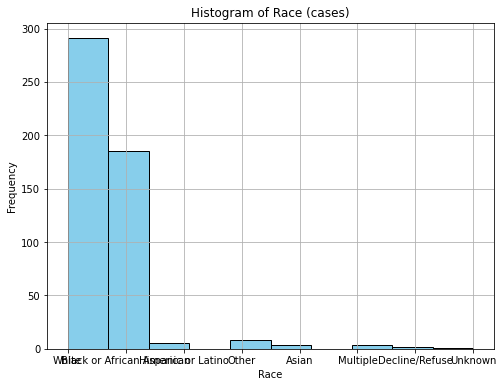

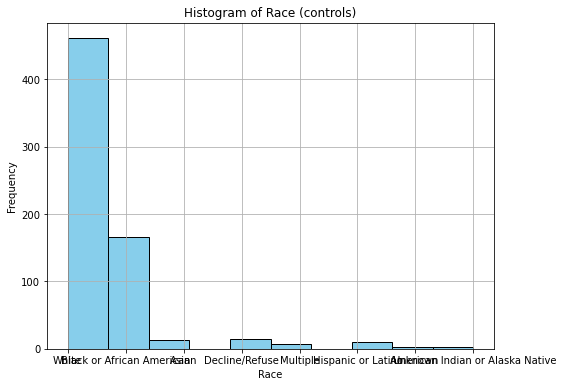

In [3]:
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (cases)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (controls)')
plt.grid(True)
plt.show()

In [4]:
whitecase = case["Race"].value_counts()['White']
blackcase = case["Race"].value_counts()['Black or African American']
whitecontrol = control["Race"].value_counts()['White']
blackcontrol = control["Race"].value_counts()['Black or African American']

In [5]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [[whitecase, blackcase], [whitecontrol, blackcontrol]]

#            white        black
# Case     casewhite    caseblack
#control   whitecontrol blackcontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.6296079804162598e-05
Dependent (reject H0)


In [6]:
mancase = case["Sex"].value_counts()['MALE']
womancase = case["Sex"].value_counts()['FEMALE']
mancontrol = control["Sex"].value_counts()['MALE']
womancontrol = control["Sex"].value_counts()['FEMALE']

In [7]:
# defining the table
data = [[mancase, womancase], [mancontrol, womancontrol]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.00027920211049463345
Dependent (reject H0)


In [8]:
case

,,Patient ID,Sex,Age in Years,Race,Infection due to central venous catheter (ICD10:T80.21),Unnamed: 6
0,1,202928,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
1,2,314213,FEMALE,-1,Black or African American,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
2,3,485745,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
3,4,768783,MALE,-1,White,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN
4,5,834924,FEMALE,58,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
...,...,...,...,...,...,...,...
495,496,2220613,FEMALE,72,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
496,497,2228753,FEMALE,52,Hispanic or Latino,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
497,498,2346020,MALE,30,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
498,499,2468128,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN


In [9]:
print(case["Marital Status"].value_counts()['Single'], ' ', case["Marital Status"].value_counts()['Married'], ' ', case["Marital Status"].value_counts()['Separated'], ' ', case["Marital Status"].value_counts()['Divorced'], ' ', case["Marital Status"].value_counts()['Unknown'])

KeyError: 'Marital Status'

In [ ]:
print(control["Marital Status"].value_counts()['Single'], ' ', control["Marital Status"].value_counts()['Married'], ' ', control["Marital Status"].value_counts()['Separated'], ' ', control["Marital Status"].value_counts()['Divorced'])

In [ ]:
# defining the table
data = [[case["Marital Status"].value_counts()['Single'], case["Marital Status"].value_counts()['Married'], case["Marital Status"].value_counts()['Separated'] + case["Marital Status"].value_counts()['Divorced']], [control["Marital Status"].value_counts()['Single'], control["Marital Status"].value_counts()['Married'], control["Marital Status"].value_counts()['Separated'] + control["Marital Status"].value_counts()['Divorced']]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

# ML ATTEMPTS

In [22]:
import numpy as np
import csv
from sklearn.utils import Bunch

def load_my_fancy_dataset(file):
    with open(r"/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-infection-500_20230911-044106.csv") as csv_file:
        data_reader = csv.reader(csv_file)
        feature_names = next(data_reader)[:-1]
        data = []
        target = []
        for row in data_reader:
            features = row[:-1]
            label = row[-1]
            data.append([d for d in features])
            target.append(label)
        
        data = np.array(data)
        target = np.array(target)
    return Bunch(data=data, target=target, feature_names=feature_names)

In [23]:
ds = load_my_fancy_dataset(casefile)

In [24]:
ds

{'data': array([['1', '202928', 'MALE', '-1', 'White',
         'ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL)'],
        ['2', '314213', 'FEMALE', '-1', 'Black or African American',
         'ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL)'],
        ['3', '485745', 'MALE', '-1', 'White',
         'ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL), ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (MSO BILLED CHARGES), ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL)'],
        ...,
        ['498', '2346020', 'MALE', '30', 'White',
         'ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL), ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CENTRAL VENOUS CATHETER (MSO BILLED CHARGES)'],
        ['499', '2468128', 'MALE', '-1', 'White',
         '

In [25]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,labels,test_size = 0.40, random_state = 42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
print(preds)

NameError: name 'features' is not defined